# 여행상품 신청여부 예측 경진대회

## 라이브러리

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## 경로 지정

In [2]:
import os
os.chdir('C:\\Users\\82107\\OneDrive\\바탕 화면\\동아리\\여행상품 신청여부 예측 경진대회')
os.getcwd()

'C:\\Users\\82107\\OneDrive\\바탕 화면\\동아리\\여행상품 신청여부 예측 경진대회'

## 데이터 불러오기

In [3]:
df=pd.read_csv('train.csv')
df.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0


In [4]:
df.tail()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
1950,1951,28.0,Self Enquiry,1,10.0,Small Business,Male,3,5.0,Basic,3.0,Single,2.0,0,1,1,2.0,Executive,20723.0,0
1951,1952,41.0,Self Enquiry,3,8.0,Salaried,Female,3,3.0,Super Deluxe,5.0,Divorced,1.0,0,5,1,1.0,AVP,31595.0,0
1952,1953,38.0,Company Invited,3,28.0,Small Business,Female,3,4.0,Basic,3.0,Divorced,7.0,0,2,1,2.0,Executive,21651.0,0
1953,1954,28.0,Self Enquiry,3,30.0,Small Business,Female,3,5.0,Deluxe,3.0,Married,3.0,0,1,1,2.0,Manager,22218.0,0
1954,1955,22.0,Company Invited,1,9.0,Salaried,Male,2,4.0,Basic,3.0,Divorced,1.0,1,3,0,0.0,Executive,17853.0,1


- 데이터 특징 살펴보기

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1861 non-null   float64
 2   TypeofContact             1945 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1853 non-null   float64
 5   Occupation                1955 non-null   object 
 6   Gender                    1955 non-null   object 
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1942 non-null   float64
 9   ProductPitched            1955 non-null   object 
 10  PreferredPropertyStar     1945 non-null   float64
 11  MaritalStatus             1955 non-null   object 
 12  NumberOfTrips             1898 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

In [6]:
df.shape

(1955, 20)

In [7]:
## 결측치 확인
df.isnull().sum()

id                            0
Age                          94
TypeofContact                10
CityTier                      0
DurationOfPitch             102
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            13
ProductPitched                0
PreferredPropertyStar        10
MaritalStatus                 0
NumberOfTrips                57
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     27
Designation                   0
MonthlyIncome               100
ProdTaken                     0
dtype: int64

In [8]:
## 각각 변수의 통계량 확인
df.describe()

,id,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,ProdTaken
count,1955.000000,1861.000000,1955.000000,1853.000000,1955.000000,1942.000000,1945.000000,1898.000000,1955.000000,1955.000000,1955.000000,1928.000000,1855.000000,1955.000000
mean,978.000000,37.462117,1.641432,15.524015,2.922762,3.718332,3.568638,3.255532,0.291049,3.067519,0.619437,1.213174,23624.108895,0.195908
std,564.504207,9.189948,0.908744,8.150057,0.712276,1.004095,0.793196,1.814698,0.454362,1.372915,0.485649,0.859450,5640.482258,0.397000
min,1.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000,0.000000
25%,489.500000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20390.000000,0.000000
50%,978.000000,36.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22295.000000,0.000000
75%,1466.500000,43.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25558.000000,0.000000
max,1955.000000,61.000000,3.000000,36.000000,5.000000,6.000000,5.000000,19.000000,1.000000,5.000000,1.000000,3.000000,98678.000000,1.000000


In [9]:
## 중복된 값 존재하는지 확인
df[df.duplicated()]

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken


- value_counts()를 통해서 값들이 얼만큼 분포되어있는지 확인

In [10]:
df['TypeofContact'].value_counts()

Self Enquiry       1379
Company Invited     566
Name: TypeofContact, dtype: int64

In [11]:
df['DurationOfPitch'].value_counts()

9.0     199
7.0     126
8.0     122
6.0     116
16.0    114
14.0    112
15.0    105
10.0    103
12.0     85
11.0     83
13.0     83
17.0     75
23.0     41
30.0     39
22.0     36
31.0     34
25.0     32
27.0     31
32.0     30
20.0     29
35.0     29
24.0     27
26.0     27
29.0     27
28.0     25
21.0     24
18.0     23
33.0     22
19.0     18
34.0     18
36.0     15
5.0       3
Name: DurationOfPitch, dtype: int64

In [12]:
df['Occupation'].value_counts()

Salaried          965
Small Business    826
Large Business    163
Free Lancer         1
Name: Occupation, dtype: int64

In [13]:
df['Gender'].value_counts()

Male       1207
Female      692
Fe Male      56
Name: Gender, dtype: int64

In [14]:
df['MaritalStatus'].value_counts()

Married      949
Divorced     375
Single       349
Unmarried    282
Name: MaritalStatus, dtype: int64

In [15]:
df[df['Gender']=='Fe Male'] 

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
11,12,31.0,Self Enquiry,1,9.0,Small Business,Fe Male,3,5.0,Deluxe,3.0,Unmarried,7.0,1,2,1,2.0,Manager,25555.0,0
57,58,40.0,Company Invited,1,15.0,Small Business,Fe Male,2,3.0,Standard,3.0,Unmarried,1.0,0,4,0,0.0,Senior Manager,28499.0,0
66,67,33.0,Company Invited,1,6.0,Salaried,Fe Male,3,3.0,Standard,3.0,Unmarried,2.0,1,1,1,0.0,Senior Manager,28458.0,0
76,77,34.0,Self Enquiry,3,23.0,Salaried,Fe Male,4,4.0,Standard,5.0,Unmarried,4.0,1,5,0,1.0,Senior Manager,27242.0,1
260,261,54.0,Self Enquiry,3,7.0,Small Business,Fe Male,3,4.0,Deluxe,5.0,Unmarried,2.0,0,2,1,2.0,Manager,27059.0,0
330,331,60.0,Self Enquiry,3,32.0,Salaried,Fe Male,3,4.0,Standard,5.0,Unmarried,2.0,0,3,1,1.0,Senior Manager,26315.0,0
348,349,41.0,Self Enquiry,1,23.0,Salaried,Fe Male,3,4.0,Standard,3.0,Unmarried,8.0,1,4,1,1.0,Senior Manager,26623.0,0
369,370,60.0,Company Invited,3,7.0,Salaried,Fe Male,3,5.0,Deluxe,3.0,Unmarried,2.0,0,5,1,2.0,Manager,24151.0,0
374,375,42.0,Company Invited,1,9.0,Salaried,Fe Male,4,5.0,Deluxe,3.0,Unmarried,4.0,1,2,0,1.0,Manager,25489.0,0
408,409,60.0,Self Enquiry,3,32.0,Salaried,Fe Male,5,4.0,Standard,5.0,Unmarried,2.0,0,3,1,2.0,Senior Manager,26315.0,0


In [16]:
df1=df.copy()
df1.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0


In [17]:
## Fe Male이 Female과 같다고 생각하여 Fe Male -> Female로 변경
df1.replace('Fe Male','Female', inplace=True)

In [18]:
df1[df1['Gender']=='Fe Male']

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken


In [19]:
## single이 unmarried와 유사한 의미라고 생각하여 single -> unmarried로 변경
df1.replace('Single','Unmarried', inplace=True)

## 시각화

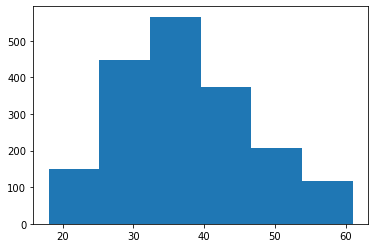

In [20]:
plt.hist('Age', data=df1, bins=6)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='count'>

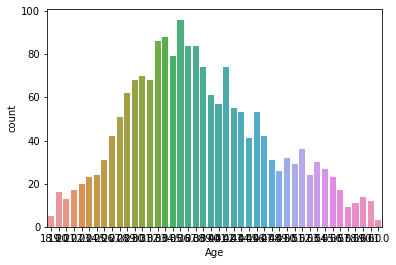

In [21]:
sns.countplot(x='Age', data=df1)

<AxesSubplot:xlabel='TypeofContact', ylabel='count'>

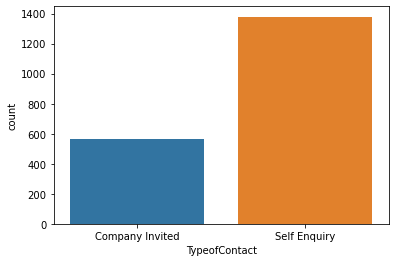

In [22]:
sns.countplot(x='TypeofContact', data=df1)

<AxesSubplot:xlabel='CityTier', ylabel='count'>

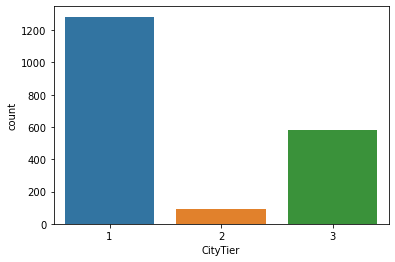

In [23]:
sns.countplot(x='CityTier', data=df1)

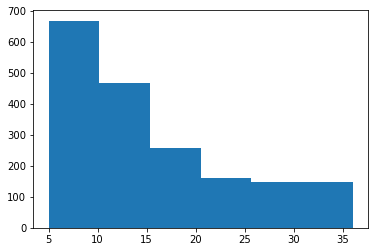

In [24]:
plt.hist('DurationOfPitch', data=df1, bins=6)
plt.show()

<AxesSubplot:xlabel='Occupation', ylabel='count'>

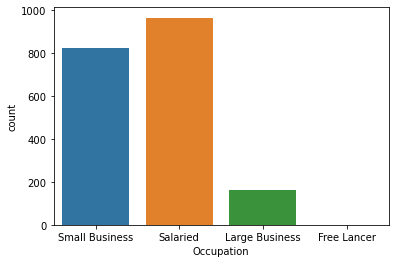

In [25]:
sns.countplot(x='Occupation', data=df1)

<AxesSubplot:xlabel='Gender', ylabel='count'>

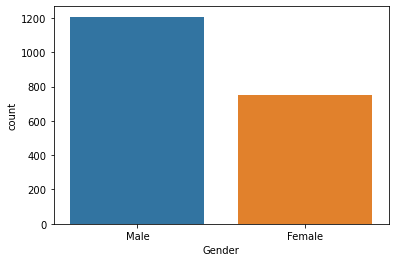

In [26]:
sns.countplot(x='Gender', data=df1)

<AxesSubplot:xlabel='NumberOfPersonVisiting', ylabel='count'>

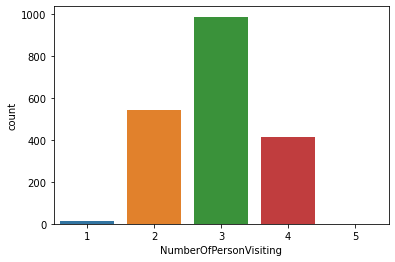

In [27]:
sns.countplot(x='NumberOfPersonVisiting', data=df1)

<AxesSubplot:xlabel='NumberOfFollowups', ylabel='count'>

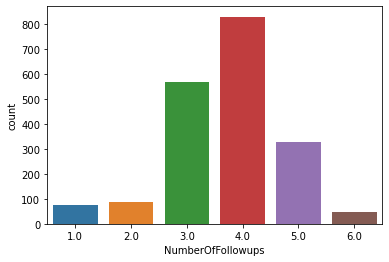

In [28]:
sns.countplot(x='NumberOfFollowups', data=df1)

<AxesSubplot:xlabel='ProductPitched', ylabel='count'>

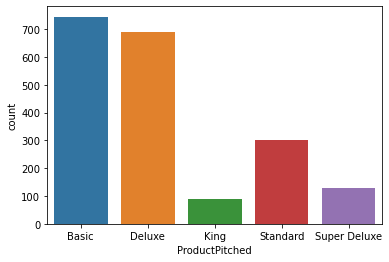

In [29]:
sns.countplot(x='ProductPitched', data=df1)

<AxesSubplot:xlabel='PreferredPropertyStar', ylabel='count'>

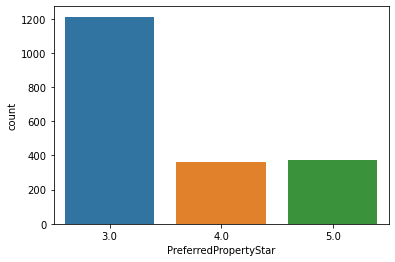

In [30]:
sns.countplot(x='PreferredPropertyStar', data=df1)

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

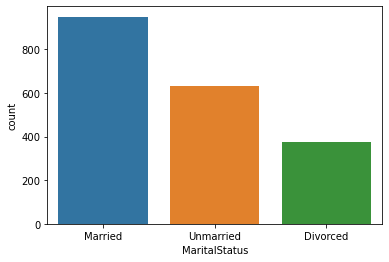

In [31]:
sns.countplot(x='MaritalStatus', data=df1)

<AxesSubplot:xlabel='NumberOfTrips', ylabel='count'>

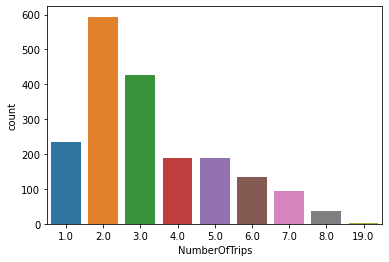

In [32]:
sns.countplot(x='NumberOfTrips', data=df1)

<AxesSubplot:xlabel='Passport', ylabel='count'>

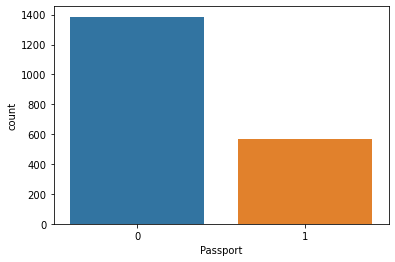

In [33]:
sns.countplot(x='Passport', data=df1)

<AxesSubplot:xlabel='PitchSatisfactionScore', ylabel='count'>

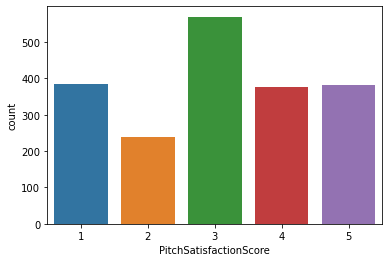

In [34]:
sns.countplot(x='PitchSatisfactionScore', data=df1)

<AxesSubplot:xlabel='OwnCar', ylabel='count'>

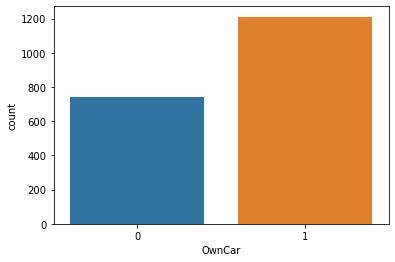

In [35]:
sns.countplot(x='OwnCar', data=df1)

<AxesSubplot:xlabel='NumberOfChildrenVisiting', ylabel='count'>

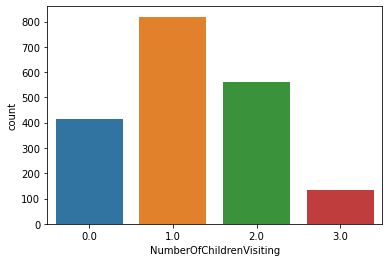

In [36]:
sns.countplot(x='NumberOfChildrenVisiting', data=df1)

<AxesSubplot:xlabel='Designation', ylabel='count'>

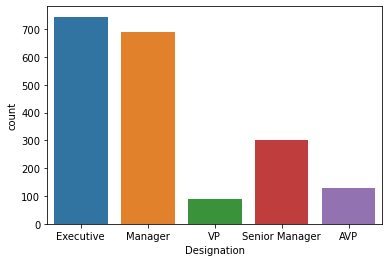

In [37]:
sns.countplot(x='Designation', data=df1)

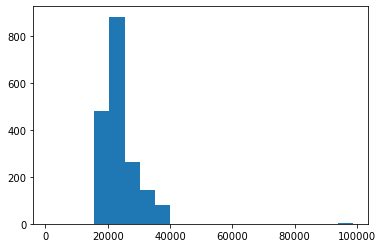

In [38]:
plt.hist('MonthlyIncome', data=df1, bins=20)
plt.show()

In [39]:
df1[df1['MonthlyIncome']>39000]

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
604,605,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,NaN,Divorced,1.0,1,2,1,0.0,Executive,95000.0,0
1338,1339,37.0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,Basic,5.0,Divorced,2.0,1,2,1,1.0,Executive,98678.0,0


<AxesSubplot:xlabel='ProdTaken', ylabel='count'>

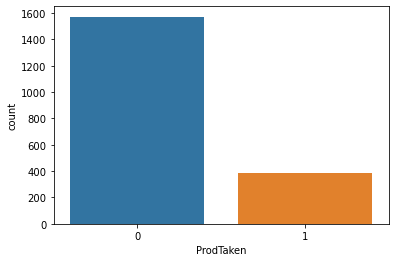

In [40]:
sns.countplot(x='ProdTaken', data=df1)

<AxesSubplot:xlabel='MonthlyIncome'>

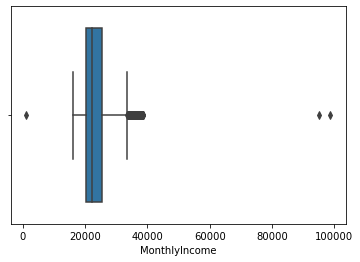

In [41]:
sns.boxplot(x='MonthlyIncome', data=df1)

<AxesSubplot:xlabel='NumberOfPersonVisiting'>

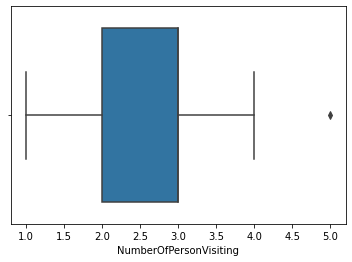

In [42]:
sns.boxplot(x='NumberOfPersonVisiting', data=df1)

<AxesSubplot:xlabel='NumberOfTrips'>

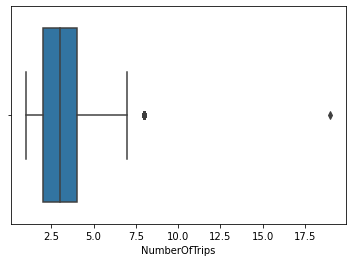

In [43]:
sns.boxplot(x='NumberOfTrips', data=df1)

In [44]:
df1.corr()

,id,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,ProdTaken
id,1.000000,0.006332,-0.022072,0.002178,0.036337,-0.010110,-0.011251,0.041546,0.009294,-0.040459,-0.013982,0.028112,0.032920,-0.048933
Age,0.006332,1.000000,0.007875,0.025779,0.010795,0.009834,-0.026789,0.178143,0.030162,0.032860,0.060298,0.039495,0.440733,-0.135832
CityTier,-0.022072,0.007875,1.000000,0.056010,0.018071,0.023532,-0.011882,-0.020887,0.013665,-0.028168,0.014177,0.025359,0.057705,0.085583
DurationOfPitch,0.002178,0.025779,0.056010,1.000000,0.096268,0.039485,-0.004448,0.022236,0.043478,0.011926,-0.015087,0.047770,0.016011,0.072899
NumberOfPersonVisiting,0.036337,0.010795,0.018071,0.096268,1.000000,0.333738,0.017057,0.214895,0.023638,-0.012981,0.018545,0.610193,0.168701,0.006483
NumberOfFollowups,-0.010110,0.009834,0.023532,0.039485,0.333738,1.000000,-0.049151,0.135183,-0.005332,-0.007195,0.051920,0.293942,0.194668,0.105038
PreferredPropertyStar,-0.011251,-0.026789,-0.011882,-0.004448,0.017057,-0.049151,1.000000,0.035064,0.014701,-0.019620,0.031355,0.027038,-0.024338,0.114923
NumberOfTrips,0.041546,0.178143,-0.020887,0.022236,0.214895,0.135183,0.035064,1.000000,0.004418,0.034816,0.005982,0.189517,0.137093,0.044922
Passport,0.009294,0.030162,0.013665,0.043478,0.023638,-0.005332,0.014701,0.004418,1.000000,0.018526,-0.045133,0.030512,0.017044,0.293726
PitchSatisfactionScore,-0.040459,0.032860,-0.028168,0.011926,-0.012981,-0.007195,-0.019620,0.034816,0.018526,1.000000,0.073097,0.023842,-0.005497,0.067736


<AxesSubplot:>

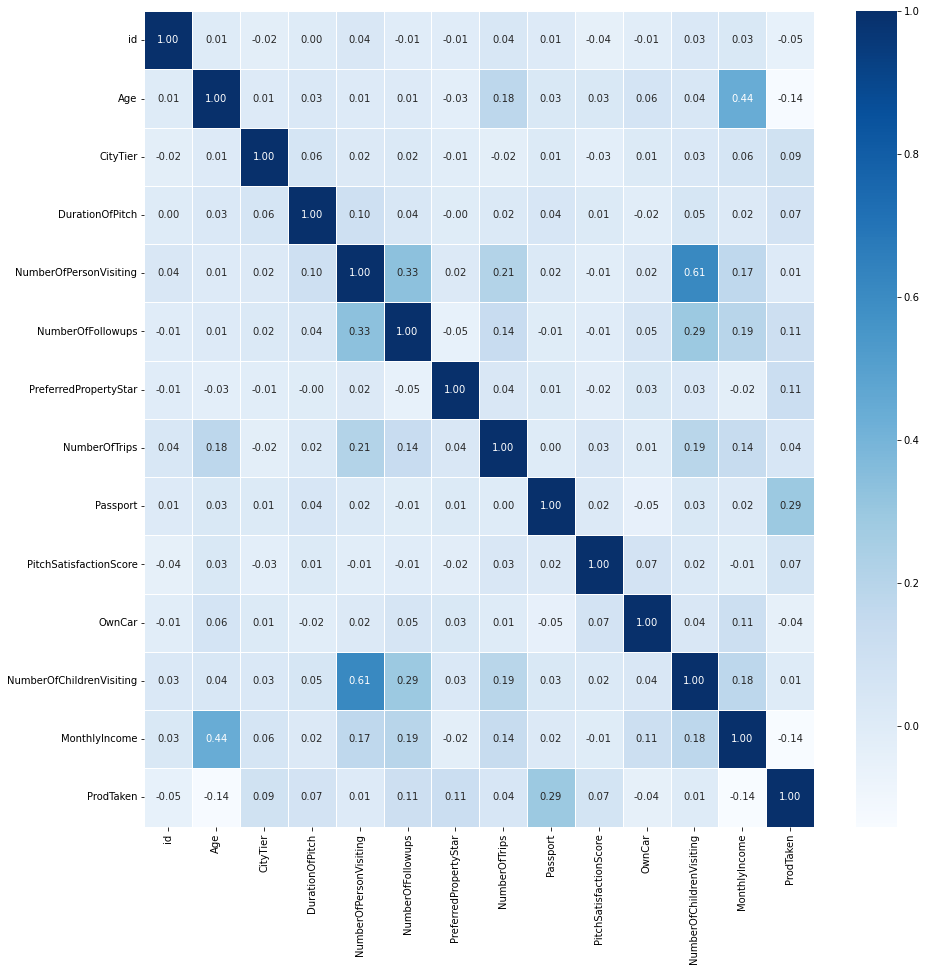

In [45]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df1.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

# 결측치 처리

In [46]:
df1.isnull().sum()

id                            0
Age                          94
TypeofContact                10
CityTier                      0
DurationOfPitch             102
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            13
ProductPitched                0
PreferredPropertyStar        10
MaritalStatus                 0
NumberOfTrips                57
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     27
Designation                   0
MonthlyIncome               100
ProdTaken                     0
dtype: int64

In [47]:
df1[(df1['Age'].isnull())&(df1['MaritalStatus']=='Married')]

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
13,14,NaN,Self Enquiry,3,6.0,Small Business,Male,2,1.0,Deluxe,5.0,Married,2.0,0,4,0,0.0,Manager,NaN,0
26,27,NaN,Self Enquiry,1,6.0,Small Business,Female,3,3.0,Basic,5.0,Married,2.0,0,1,1,0.0,Executive,18591.0,0
35,36,NaN,Self Enquiry,2,14.0,Salaried,Male,2,3.0,Deluxe,4.0,Married,3.0,0,3,1,1.0,Manager,NaN,0
121,122,NaN,Self Enquiry,1,35.0,Small Business,Male,3,3.0,Basic,5.0,Married,2.0,0,4,1,1.0,Executive,NaN,0
127,128,NaN,Company Invited,1,11.0,Salaried,Male,2,1.0,Deluxe,5.0,Married,2.0,0,5,1,1.0,Manager,NaN,0
137,138,NaN,Self Enquiry,3,35.0,Salaried,Male,3,3.0,Deluxe,5.0,Married,1.0,0,1,1,0.0,Manager,NaN,0
139,140,NaN,Self Enquiry,1,7.0,Small Business,Male,3,3.0,Basic,4.0,Married,1.0,1,4,1,2.0,Executive,18579.0,0
164,165,NaN,Self Enquiry,1,14.0,Small Business,Female,3,3.0,Basic,5.0,Married,2.0,1,3,0,2.0,Executive,NaN,1
184,185,NaN,Self Enquiry,3,29.0,Small Business,Female,2,4.0,Deluxe,3.0,Married,2.0,0,1,1,1.0,Manager,18540.0,0
199,200,NaN,Company Invited,1,24.0,Salaried,Male,2,1.0,Basic,3.0,Married,5.0,0,5,1,1.0,Executive,18688.0,0


In [48]:
df1[(df1['Age'].isnull())&(df1['MaritalStatus']=='Single')]

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken


In [49]:
df1[(df1['Age'].isnull())&(df1['MaritalStatus']=='Divorced')]

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
124,125,NaN,Self Enquiry,3,8.0,Small Business,Female,2,3.0,Deluxe,3.0,Divorced,3.0,0,5,1,0.0,Manager,NaN,0
179,180,NaN,Self Enquiry,3,9.0,Salaried,Male,3,3.0,Deluxe,5.0,Divorced,2.0,1,4,1,0.0,Manager,NaN,0
312,313,NaN,Self Enquiry,1,6.0,Small Business,Male,3,3.0,Basic,4.0,Divorced,1.0,1,4,1,2.0,Executive,18579.0,0
630,631,NaN,Company Invited,1,6.0,Salaried,Female,3,3.0,Deluxe,5.0,Divorced,2.0,0,5,1,2.0,Manager,NaN,0
637,638,NaN,Self Enquiry,1,14.0,Salaried,Male,3,3.0,Deluxe,3.0,Divorced,1.0,0,3,1,0.0,Manager,18697.0,0
701,702,NaN,Self Enquiry,1,6.0,Salaried,Male,2,4.0,Basic,3.0,Divorced,2.0,1,2,0,0.0,Executive,18622.0,0
717,718,NaN,Self Enquiry,1,9.0,Small Business,Male,3,3.0,Basic,5.0,Divorced,6.0,0,5,1,1.0,Executive,NaN,1
722,723,NaN,Company Invited,3,10.0,Small Business,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,2,1,0.0,Manager,NaN,0
905,906,NaN,Self Enquiry,3,29.0,Small Business,Female,2,4.0,Deluxe,3.0,Divorced,1.0,1,2,1,0.0,Manager,NaN,0
1167,1168,NaN,Self Enquiry,1,10.0,Salaried,Male,1,3.0,Deluxe,3.0,Divorced,1.0,1,4,0,0.0,Manager,NaN,0


In [50]:
df1.groupby('MaritalStatus').describe().Age

,count,mean,std,min,25%,50%,75%,max
MaritalStatus,,,,,,,,
Divorced,355.0,38.887324,9.535466,22.0,32.0,37.0,45.5,61.0
Married,905.0,37.761326,8.493650,21.0,31.0,37.0,43.0,61.0
Unmarried,601.0,36.169717,9.821464,18.0,30.0,35.0,42.0,61.0


- MaritalStatus의 각각 중앙값으로 채움

In [51]:
## MaritalStatus의 각각 중앙값으로 채움
df1['Age']=df1['Age'].fillna(df1.groupby('MaritalStatus')['Age'].transform('median'))

- DurationOfPitch 중앙값으로 결측치 채우기

In [52]:
df1[df1['DurationOfPitch'].isnull()]

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Unmarried,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
8,9,36.0,Company Invited,3,NaN,Small Business,Female,2,1.0,Deluxe,5.0,Divorced,3.0,0,1,1,0.0,Manager,19639.0,0
50,51,27.0,NaN,3,NaN,Small Business,Male,2,3.0,Deluxe,3.0,Married,1.0,0,3,1,1.0,Manager,NaN,0
60,61,26.0,Self Enquiry,1,NaN,Salaried,Male,3,4.0,Basic,5.0,Married,6.0,0,5,1,1.0,Executive,19796.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,1898,25.0,NaN,3,NaN,Salaried,Male,3,4.0,Basic,5.0,Divorced,4.0,0,1,1,0.0,Executive,NaN,1
1911,1912,26.0,NaN,1,NaN,Salaried,Female,3,5.0,Basic,3.0,Married,4.0,0,4,1,0.0,Executive,NaN,0
1912,1913,32.0,Company Invited,3,NaN,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,1.0,0,4,1,2.0,Manager,NaN,0
1946,1947,43.0,Company Invited,1,NaN,Small Business,Female,3,2.0,Basic,3.0,Unmarried,5.0,0,3,0,2.0,Executive,19739.0,0


- DurationOfPitch 중앙값으로 결측치 채우기

In [53]:
df1['DurationOfPitch']=df1['DurationOfPitch'].fillna(df1['DurationOfPitch'].median())

- TypeofContact 결측치: Self Enquiry로 채우기

In [54]:
df1['TypeofContact']=df1['TypeofContact'].fillna('Self Enquiry')

In [55]:
df1[df1['NumberOfFollowups'].isnull()]

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
43,44,28.0,Self Enquiry,2,14.0,Small Business,Male,3,NaN,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,19936.0,0
318,319,41.0,Self Enquiry,1,13.0,Small Business,Female,2,NaN,Deluxe,3.0,Unmarried,7.0,0,3,1,0.0,Manager,20003.0,0
341,342,32.0,Self Enquiry,1,15.0,Salaried,Female,3,NaN,Basic,4.0,Unmarried,3.0,0,4,0,2.0,Executive,19939.0,1
345,346,25.0,Self Enquiry,3,16.0,Salaried,Male,2,NaN,Deluxe,3.0,Unmarried,1.0,0,2,0,1.0,Manager,19950.0,0
393,394,28.0,Self Enquiry,3,11.0,Small Business,Male,3,NaN,Deluxe,3.0,Unmarried,2.0,0,3,0,1.0,Manager,19908.0,0
514,515,31.0,Company Invited,1,6.0,Salaried,Male,2,NaN,Deluxe,5.0,Married,2.0,0,1,1,1.0,Manager,20003.0,0
571,572,52.0,Self Enquiry,1,14.0,Small Business,Male,2,NaN,Deluxe,4.0,Divorced,3.0,0,2,1,1.0,Manager,19941.0,1
813,814,36.0,Company Invited,1,10.0,Salaried,Male,3,NaN,Basic,3.0,Married,3.0,0,1,1,2.0,Executive,19959.0,0
1015,1016,22.0,Self Enquiry,1,22.0,Salaried,Male,4,NaN,Basic,3.0,Unmarried,3.0,0,3,1,2.0,Executive,19910.0,0
1080,1081,32.0,Self Enquiry,3,12.0,Small Business,Male,2,NaN,Deluxe,3.0,Unmarried,2.0,0,5,1,0.0,Manager,20010.0,0


- NumberOfFollowups, PreferredPropertyStar, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting 최빈값으로 채우기

In [56]:
df1['NumberOfFollowups'].mode()

0    4.0
dtype: float64

In [57]:
df1['NumberOfFollowups']=df1['NumberOfFollowups'].fillna(4.0)

In [58]:
df1['PreferredPropertyStar'].mode()

0    3.0
dtype: float64

In [59]:
df1['PreferredPropertyStar']=df1['PreferredPropertyStar'].fillna(3.0)

In [60]:
df1['NumberOfTrips'].mode()

0    2.0
dtype: float64

In [61]:
df1['NumberOfTrips']=df1['NumberOfTrips'].fillna(2.0)

In [62]:
df1['NumberOfChildrenVisiting'].mode()

0    1.0
dtype: float64

In [63]:
df1['NumberOfChildrenVisiting']=df1['NumberOfChildrenVisiting'].fillna(1.0)

In [64]:
df[(df['MonthlyIncome'].isnull())&(df['Designation']=='Executive')]

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
83,84,28.0,NaN,1,NaN,Small Business,Male,2,3.0,Basic,3.0,Single,7.0,0,3,1,1.0,Executive,NaN,1
121,122,NaN,Self Enquiry,1,35.0,Small Business,Male,3,3.0,Basic,5.0,Married,2.0,0,4,1,1.0,Executive,NaN,0
164,165,NaN,Self Enquiry,1,14.0,Small Business,Female,3,3.0,Basic,5.0,Married,2.0,1,3,0,2.0,Executive,NaN,1
253,254,NaN,Self Enquiry,1,9.0,Small Business,Male,3,3.0,Basic,5.0,Married,6.0,0,5,1,1.0,Executive,NaN,1
270,271,NaN,Self Enquiry,1,6.0,Salaried,Male,3,4.0,Basic,3.0,Single,1.0,1,5,0,2.0,Executive,NaN,1
362,363,26.0,NaN,1,NaN,Salaried,Female,3,5.0,Basic,3.0,Married,4.0,0,4,1,2.0,Executive,NaN,0
395,396,NaN,Self Enquiry,1,30.0,Small Business,Male,2,3.0,Basic,4.0,Married,2.0,1,1,0,0.0,Executive,NaN,1
477,478,34.0,NaN,1,NaN,Small Business,Female,2,4.0,Basic,5.0,Single,2.0,0,2,1,1.0,Executive,NaN,0
495,496,NaN,Company Invited,1,10.0,Large Business,Male,3,4.0,Basic,3.0,Single,6.0,0,5,0,0.0,Executive,NaN,1
525,526,NaN,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Single,2.0,0,4,1,1.0,Executive,NaN,1


- MonthlyIncome: Designation 그룹별 평균으로 채우기

In [65]:
df1.groupby('Designation').describe().MonthlyIncome

,count,mean,std,min,25%,50%,75%,max
Designation,,,,,,,,
AVP,130.0,32148.438462,3091.784939,17705.0,30743.50,32129.0,34924.25,36602.0
Executive,710.0,20110.209859,4737.225047,16009.0,17694.25,20749.5,21455.00,98678.0
Manager,624.0,22614.373397,2510.746855,1000.0,20744.75,22956.0,24240.00,35558.0
Senior Manager,302.0,26715.056291,2856.902971,17875.0,25018.00,26327.0,28749.25,38395.0
VP,89.0,35796.179775,2468.671775,21195.0,34232.00,34943.0,37822.00,38651.0


In [66]:
df1['MonthlyIncome']=df1['MonthlyIncome'].fillna(df1.groupby('Designation')['MonthlyIncome'].transform('mean'))

In [67]:
df1.isnull().sum()

id                          0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
ProdTaken                   0
dtype: int64

## 데이터 전처리

In [68]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1955 non-null   float64
 2   TypeofContact             1955 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1955 non-null   float64
 5   Occupation                1955 non-null   object 
 6   Gender                    1955 non-null   object 
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1955 non-null   float64
 9   ProductPitched            1955 non-null   object 
 10  PreferredPropertyStar     1955 non-null   float64
 11  MaritalStatus             1955 non-null   object 
 12  NumberOfTrips             1955 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

- TypeofContact 숫자로 변환

In [69]:
df1['TypeofContact'].value_counts() 

Self Enquiry       1389
Company Invited     566
Name: TypeofContact, dtype: int64

In [70]:
df1.replace('Self Enquiry', 0, inplace=True)  # Self Enquiry -> 0
df1.replace('Company Invited', 1, inplace=True) # Company Invited -> 1

- Occupation 숫자로 변환

In [71]:
df1['Occupation'].value_counts() 

Salaried          965
Small Business    826
Large Business    163
Free Lancer         1
Name: Occupation, dtype: int64

In [72]:
df1.replace('Free Lancer', 1, inplace=True) # Free Lancer -> 1
df1.replace('Small Business', 2, inplace=True) # Small Business -> 2
df1.replace('Large Business', 3, inplace=True) # Lagrge Business -> 3
df1.replace('Salaried', 4, inplace=True) # Salaried -> 4

- Gender 숫자로 변환

In [73]:
df1['Gender'].value_counts() 

Male      1207
Female     748
Name: Gender, dtype: int64

In [74]:
df1.replace('Male', 0, inplace=True) # Male -> 0
df1.replace('Female', 1, inplace=True) # Female -> 1

- ProductPitched 숫자로 변환

In [75]:
df1['ProductPitched'].value_counts() 

Basic           745
Deluxe          689
Standard        302
Super Deluxe    130
King             89
Name: ProductPitched, dtype: int64

In [76]:
df1.replace('Basic', 1, inplace=True) # Basic -> 1
df1.replace('Standard', 2, inplace=True) # Standard -> 2
df1.replace('Deluxe', 3, inplace=True) # Deluxe -> 3
df1.replace('Super Deluxe', 4, inplace=True) # Super Deluxe -> 4
df1.replace('King', 5, inplace=True) # King -> 5

- MaritalStatus 숫자로 변환

In [77]:
df1['MaritalStatus'].value_counts() 

Married      949
Unmarried    631
Divorced     375
Name: MaritalStatus, dtype: int64

In [78]:
df1.replace('Unmarried', 1, inplace=True) # Unmarried -> 1
df1.replace('Divorced', 2, inplace=True) # Divorced -> 2
df1.replace('Married', 3, inplace=True) # Married -> 3

- Designation 숫자로 변환

In [79]:
df1['Designation'].value_counts() 

Executive         745
Manager           689
Senior Manager    302
AVP               130
VP                 89
Name: Designation, dtype: int64

In [80]:
df1.replace('Manager', 1, inplace=True) # Manager -> 1
df1.replace('Senior Manager', 2, inplace=True) # Senior Manager -> 2
df1.replace('AVP', 3, inplace=True) # AVP -> 3
df1.replace('VP', 4, inplace=True) # VP -> 4
df1.replace('Executive', 5, inplace=True) # Executive -> 5

In [81]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1955 non-null   float64
 2   TypeofContact             1955 non-null   int64  
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1955 non-null   float64
 5   Occupation                1955 non-null   int64  
 6   Gender                    1955 non-null   int64  
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1955 non-null   float64
 9   ProductPitched            1955 non-null   int64  
 10  PreferredPropertyStar     1955 non-null   float64
 11  MaritalStatus             1955 non-null   int64  
 12  NumberOfTrips             1955 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

## 이상치 처리

<AxesSubplot:xlabel='MonthlyIncome'>

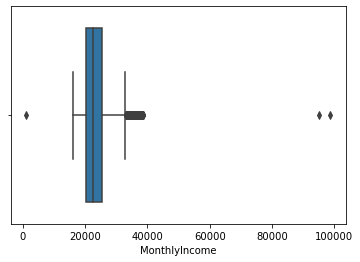

In [82]:
sns.boxplot(x='MonthlyIncome', data=df1)

<AxesSubplot:xlabel='NumberOfPersonVisiting'>

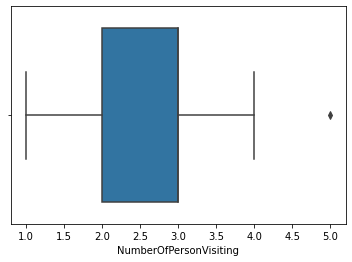

In [83]:
sns.boxplot(x='NumberOfPersonVisiting', data=df1)

<AxesSubplot:xlabel='NumberOfTrips'>

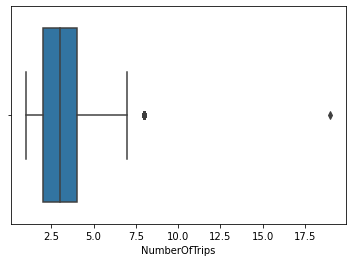

In [84]:
sns.boxplot(x='NumberOfTrips', data=df1)

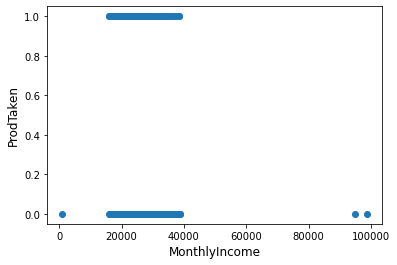

In [85]:
plt.scatter(x='MonthlyIncome', y='ProdTaken', data=df1)
plt.xlabel('MonthlyIncome', size=12)
plt.ylabel('ProdTaken', size=12)
plt.show()

In [86]:
df1[df1['MonthlyIncome']<10000]

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
189,190,38.0,0,1,9.0,3,1,2,3.0,3,3.0,1,4.0,1,5,0,0.0,1,1000.0,0


In [87]:
df1=df1.drop(labels=189, axis=0)

In [88]:
df1[df1['MonthlyIncome']>80000]

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
604,605,36.0,0,1,11.0,4,1,2,4.0,1,3.0,2,1.0,1,2,1,0.0,5,95000.0,0
1338,1339,37.0,0,1,12.0,4,1,3,5.0,1,5.0,2,2.0,1,2,1,1.0,5,98678.0,0


In [89]:
df1=df1.drop(labels=604, axis=0)

In [90]:
df1=df1.drop(labels=1338, axis=0)

In [91]:
df1[df1['NumberOfTrips']>10]

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
987,988,30.0,1,1,10.0,3,0,2,3.0,1,3.0,1,19.0,1,4,1,1.0,5,17285.0,1


In [92]:
df1=df1.drop(labels=987, axis=0)

## XGBoost gridsearch

In [95]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [96]:
df1=df1.drop(['id'], axis=1)

In [97]:
x=df1.drop(['ProdTaken'], axis=1)
y=df1['ProdTaken']
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size = 0.3, random_state=2021)

In [98]:
xgb_model=XGBClassifier(random_state=2021)

In [99]:
search_space={
    "n_estimators":[100, 200, 500],
    "max_depth":[3, 6, 9],
    "gamma":[0.01, 0.1],
    "learning_rate":[0.001, 0.01, 0.1, 1]
}

In [103]:
from sklearn.model_selection import GridSearchCV
GS=GridSearchCV(estimator=xgb_model, 
               param_grid=search_space,
               scoring=['accuracy'],
               refit='accuracy',
               cv=5,
               verbose=4)

In [104]:
GS.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; accuracy: (test=0.850) total time=   0.0s
[CV 2/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; accuracy: (test=0.810) total time=   0.0s
[CV 3/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; accuracy: (test=0.821) total time=   0.0s
[CV 4/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; accuracy: (test=0.846) total time=   0.0s
[CV 5/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; accuracy: (test=0.828) total time=   0.0s
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=200; accuracy: (test=0.850) total time=   0.0s
[CV 2/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=200; accuracy: (test=0.828) total time=   0.0s
[CV 3/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=200; accuracy: (test=0.821) total

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                        

In [105]:
print(GS.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.01, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=2021, reg_alpha=0, reg_lambda=1, ...)


In [106]:
print(GS.best_params_)

{'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 500}


In [107]:
print(GS.best_score_)

0.8732600732600734


In [108]:
estimator=GS.best_estimator_
prediction=estimator.predict(x_test)

## Test set

In [109]:
test=pd.read_csv('test.csv')
test.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,32.0,Company Invited,3,NaN,Small Business,Male,2,5.0,Deluxe,3.0,Married,1.0,0,2,0,1.0,Manager,19668.0
1,2,46.0,Self Enquiry,2,11.0,Small Business,Male,3,NaN,Deluxe,4.0,Married,1.0,1,5,0,1.0,Manager,20021.0
2,3,37.0,Self Enquiry,3,22.0,Small Business,Male,3,4.0,Deluxe,3.0,Married,5.0,0,5,1,0.0,Manager,21334.0
3,4,43.0,Self Enquiry,1,36.0,Small Business,Male,3,6.0,Deluxe,3.0,Unmarried,6.0,0,3,1,2.0,Manager,22950.0
4,5,25.0,Self Enquiry,3,7.0,Large Business,Female,4,4.0,Basic,4.0,Unmarried,3.0,1,4,1,3.0,Executive,21880.0


In [110]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2933 entries, 0 to 2932
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        2933 non-null   int64  
 1   Age                       2801 non-null   float64
 2   TypeofContact             2918 non-null   object 
 3   CityTier                  2933 non-null   int64  
 4   DurationOfPitch           2784 non-null   float64
 5   Occupation                2933 non-null   object 
 6   Gender                    2933 non-null   object 
 7   NumberOfPersonVisiting    2933 non-null   int64  
 8   NumberOfFollowups         2901 non-null   float64
 9   ProductPitched            2933 non-null   object 
 10  PreferredPropertyStar     2917 non-null   float64
 11  MaritalStatus             2933 non-null   object 
 12  NumberOfTrips             2850 non-null   float64
 13  Passport                  2933 non-null   int64  
 14  PitchSat

In [111]:
test['Age']=test['Age'].fillna(test.groupby('MaritalStatus')['Age'].transform('median'))

In [112]:
test['DurationOfPitch']=test['DurationOfPitch'].fillna(test['DurationOfPitch'].median())

In [113]:
test['TypeofContact']=test['TypeofContact'].fillna('Self Enquiry')

In [114]:
test['NumberOfFollowups']=test['NumberOfFollowups'].fillna(4.0)

In [115]:
test['PreferredPropertyStar']=test['PreferredPropertyStar'].fillna(3.0)

In [116]:
test['NumberOfTrips']=test['NumberOfTrips'].fillna(2.0)

In [117]:
test['NumberOfChildrenVisiting']=test['NumberOfChildrenVisiting'].fillna(1.0)

In [118]:
test['MonthlyIncome']=test['MonthlyIncome'].fillna(test.groupby('Designation')['MonthlyIncome'].transform('mean'))

In [119]:
test.replace('Fe Male','Female', inplace=True)

In [120]:
test.replace('Single','Unmarried', inplace=True)

In [121]:
test.replace('Self Enquiry', 0, inplace=True)  
test.replace('Company Invited', 1, inplace=True)

In [122]:
test.replace('Free Lancer', 1, inplace=True) 
test.replace('Small Business', 2, inplace=True)
test.replace('Large Business', 3, inplace=True) 
test.replace('Salaried', 4, inplace=True)

In [123]:
test.replace('Male', 0, inplace=True)
test.replace('Female', 1, inplace=True)

In [124]:
test.replace('Basic', 1, inplace=True) 
test.replace('Standard', 2, inplace=True) 
test.replace('Deluxe', 3, inplace=True)
test.replace('Super Deluxe', 4, inplace=True) 
test.replace('King', 5, inplace=True)

In [125]:
test.replace('Unmarried', 1, inplace=True) 
test.replace('Divorced', 2, inplace=True) 
test.replace('Married', 3, inplace=True) 

In [126]:
test.replace('Manager', 1, inplace=True) 
test.replace('Senior Manager', 2, inplace=True) 
test.replace('AVP', 3, inplace=True) 
test.replace('VP', 4, inplace=True) 
test.replace('Executive', 5, inplace=True)

In [127]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2933 entries, 0 to 2932
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        2933 non-null   int64  
 1   Age                       2933 non-null   float64
 2   TypeofContact             2933 non-null   int64  
 3   CityTier                  2933 non-null   int64  
 4   DurationOfPitch           2933 non-null   float64
 5   Occupation                2933 non-null   int64  
 6   Gender                    2933 non-null   int64  
 7   NumberOfPersonVisiting    2933 non-null   int64  
 8   NumberOfFollowups         2933 non-null   float64
 9   ProductPitched            2933 non-null   int64  
 10  PreferredPropertyStar     2933 non-null   float64
 11  MaritalStatus             2933 non-null   int64  
 12  NumberOfTrips             2933 non-null   float64
 13  Passport                  2933 non-null   int64  
 14  PitchSat

In [128]:
test=test.drop(['id'], axis=1)

In [129]:
pred=estimator.predict(test)
pred

array([1, 0, 0, ..., 0, 0, 0])

In [130]:
sample_submission=pd.read_csv('sample_submission.csv')
sample_submission.head()

,id,ProdTaken
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [131]:
sample_submission['ProdTaken'] = pred
sample_submission.head()

,id,ProdTaken
0,1,1
1,2,0
2,3,0
3,4,0
4,5,0


In [132]:
sample_submission.to_csv('submission(5).csv', index=False)